In [ ]:
# Using stapep.generate_covalent_template to generate parameter templates for non-standard amino acids
# --smiles1: The first non-standard amino acid SMILES, including COOH and NH2 on the main chain
# --name1: The first non-standard amino acid name, must be 3 uppercase characters
# --smiles2: The second non-standard amino acid SMILES, including COOH and NH2 on the main chain
# --name2: The second non-standard amino acid name, must be 3 uppercase characters
# --nbonds: The number of bonds between the two non-standard amino acids
# --charge1: The charge of the first non-standard amino acid, if not specified, it will default to 0.0
# --charge2: The charge of the second non-standard amino acid, if not specified, it will default to 0.0
# --output: Output path, if not specified, it will default to the name folder in the current directory

# The generated parameter templates will be saved in the output path, and the parameter templates will be named as "R1A_R2A"
!rm -rf data/R1A_R2A

# Generate parameter templates for non-standard amino acids
# smiles1 and smiles2 must include * to represent the connection point and the main chain must include COOH and NH2
!python -m stapep.generate_covalent_template \
    --smiles1 "[*]C(C)C[C@@H](N)C(=O)O" \
    --name1 R1A \
    --smiles2 "[*]CC(C)C[C@@H](N)C(=O)O" \
    --name2 R2A \
    --nbonds 2 \
    --output data/R1A_R2A

# Output the generated parameter templates of covalent non-standard amino acids
# 1. R1A.prepin and R1A.frcmod: The parameter files for the first non-standard amino acid
# 2. R2A.prepin and R2A.frcmod: The parameter files for the second non-standard amino acid
# 3. covalent_info.csv: The covalent information file

args.smiles1: [*]C(C)C[C@@H](N)C(=O)O
args.smiles2: [*]CC(C)C[C@@H](N)C(=O)O
antechamber -fi sdf -i R1A.sdf -bk R1A -fo ac -o R1A.ac -c bcc -at amber

Welcome to antechamber 22.0: molecular input file processor.

Info: acdoctor mode is on: check and diagnose problems in the input file.
Info: The atom type is set to amber; the options available to the -at flag are
      gaff, gaff2, amber, bcc, and sybyl.

-- Check Format for sdf File --
   Status: pass
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Status: pass
acdoctor mode has completed checking the input file.

sh: /home/dahuilangda/Simulation/miniconda3/envs/stap/lib/libtinfo.so.6: no version information available (required by sh)
/bin/bash: /home/dahuilangda/Simulation/miniconda3/envs/stap/lib/libtinfo.so.6: no version information

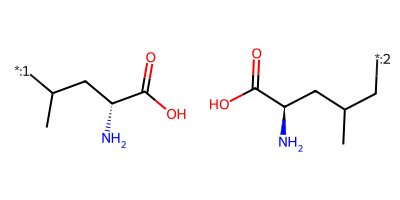

In [12]:
# Show the structure of the non-standard amino acids

from rdkit import Chem
from rdkit.Chem import Draw

# smiles1 and smiles2 must include * to represent the connection point and the main chain must include COOH and NH2
smiles1 = "[*:1]C(C)C[C@@H](N)C(=O)O"
smiles2 = "[*:2]CC(C)C[C@@H](N)C(=O)O"
molecule1 = Chem.MolFromSmiles(smiles1)
molecule2 = Chem.MolFromSmiles(smiles2)
Draw.MolsToGridImage([molecule1, molecule2], molsPerRow=2)

In [9]:
import os
import pandas as pd
# os.environ['HF_ENDPOINT'] = 'https://hf-mirror.com' # 国内用户取消注释这一行
from stapep.structure import Structure

# Define the additional_residues and covalent_info
additional_residues = {
    'R1A': (
        'data/R1A_R2A/R1A.prepin',
        'data/R1A_R2A/frcmod.R1A',
    ),
    'R2A': (
        'data/R1A_R2A/R2A.prepin',
        'data/R1A_R2A/frcmod.R2A',
    )
}

covalent_info = pd.read_csv('data/R1A_R2A/covalent_info.csv')

output = 'data'
seq = 'SSKL-R1A-QLLF-R2A' # Define the peptide sequence
# De novo 3D structure prediction using ESMFOLD
st = Structure(verbose=True)
st.de_novo_3d_structure(seq, 
                        output_pdb='data/denovo.pdb',
                        additional_residues=additional_residues,
                        covalent_info=covalent_info)

Some weights of EsmForProteinFolding were not initialized from the model checkpoint at facebook/esmfold_v1 and are newly initialized: ['esm.contact_head.regression.bias', 'esm.contact_head.regression.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:parmed.structure:Adding bonds...
INFO:parmed.structure:Adding angles...
INFO:parmed.structure:Adding dihedrals...
INFO:parmed.structure:Adding Ryckaert-Bellemans torsions...
INFO:parmed.structure:Adding Urey-Bradleys...
INFO:parmed.structure:Adding improper torsions...
INFO:parmed.structure:Adding CMAP torsions...
INFO:parmed.structure:Adding trigonal angle terms...
INFO:parmed.structure:Adding out-of-plane bends...
INFO:parmed.structure:Adding pi-torsions...
INFO:parmed.structure:Adding stretch-bends...
INFO:parmed.structure:Adding torsion-torsions...
INFO:parmed.structure:Adding Nonbonded force...
INFO:parmed.structure:Adding GB force...
INFO:root:Running short tim

-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/prep to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/lib to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd to search path.
-f: Source tleap.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./tleap.in
----- Source: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd/leaprc.protein.ff14SB
----- Source of /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd/leaprc.protein.ff14SB done
Log file: ./leap.log
Loading parameters: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm/parm10.dat
Reading title:
PARM99 + frcmod.ff99SB + frcmod.parmbsc0 + OL3 for RNA
Loading parameters: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm/frcmod.ff14SB
Reading force field modification type file (frcmod)
Reading ti

'data/denovo.pdb'

In [18]:
import py3Dmol
from stapep.utils import ProtParamsSeq

from rdkit.Chem import Descriptors

# Define the stapled residue names
covalent_resnames = ['R1A', 'R2A']

additional_params = {
    'weight': {
        'R1A': Descriptors.ExactMolWt(molecule1),
        'R2A': Descriptors.ExactMolWt(molecule2)
    }
}

# Process the sequence to locate stapled residues
pps = ProtParamsSeq(seq, additional_params=additional_params)
seq_ = pps.seq_to_list
covalent_residues = [seq_.index(s)+1 for s in seq_ if s in covalent_resnames]

# Load the PDB file
p = py3Dmol.view(query='data/denovo.pdb')

# Set default style as cartoon
p.setStyle({'model': 0}, {'cartoon': {'color': 'gray'}})

# Highlight stapled residues with stick style
for res in covalent_residues:
    p.addStyle({'model': 0, 'resi': res}, {'stick': {'color': 'orange'}})

# Adjust the view
p.zoomTo()

# Display the visualization
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Molecular Dynamics

In [4]:
import os
import pandas as pd
# os.environ['HF_ENDPOINT'] = 'https://hf-mirror.com' # 国内用户取消注释这一行
from stapep.molecular_dynamics import PrepareProt

# Define the additional_residues and covalent_info
additional_residues = {
    'R1A': (
        'data/R1A_R2A/R1A.prepin',
        'data/R1A_R2A/frcmod.R1A',
    ),
    'R2A': (
        'data/R1A_R2A/R2A.prepin',
        'data/R1A_R2A/frcmod.R2A',
    )
}

covalent_info = pd.read_csv('data/R1A_R2A/covalent_info.csv')

output = 'data'
seq = 'SSKL-R1A-QLLF-R2A' # Define the peptide sequence
pp = PrepareProt(seq, output, method='alphafold', additional_residues=additional_residues, covalent_info=covalent_info)
pp._gen_prmtop_and_inpcrd_file()

Some weights of EsmForProteinFolding were not initialized from the model checkpoint at facebook/esmfold_v1 and are newly initialized: ['esm.contact_head.regression.bias', 'esm.contact_head.regression.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/prep to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/lib to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd to search path.
-f: Source tleap.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./tleap.in
----- Source: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd/leaprc.protein.ff14SB
----- Source of /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd/leaprc.protein.ff14SB done
Log file: ./leap.log
Loading parameters: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm/parm10.dat
Reading title:
PARM99 + frcmod.ff99SB + frcmod.parmbsc0 + OL3 for RNA
Loading parameters: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm/frcmod.ff14SB
Reading force field modification type file (frcmod)
Reading ti

In [5]:
from stapep.molecular_dynamics import Simulation

sim = Simulation(output)
sim.setup(
        type='implicit', # 'explicit' or 'implicit'
        solvent='water', # 'water' or 'chloroform'
        temperature=300, # Kelvin
        friction=1, # ps^-1
        timestep=2, # fs
        interval=100, # ps
        nsteps=500000 # 1 ns
    )
sim.minimize()
sim.run()

Minimizing...
Running...
Done! Time elapsed: 21.00829792022705 s
